# Entrega 1 - Projeto FarmTech Solutions – Visão Computacional com YOLOv5
## Este projeto demonstra a aplicação de um sistema de visão computacional usando YOLOv5, com foco em dois objetos distintos: **cat** e **bike**. O objetivo é treinar um modelo capaz de identificar esses objetos com alta acurácia, validando seu uso em cenários reais da FarmTech Solutions.

## 1. Preparação do Ambiente
## 2. Organização do Dataset
## 3. Treinamento do Modelo
## 4. Métricas a comparar ['mAP@0.5', 'Precisão', 'Revocação', 'Box Loss', 'Obj Loss', 'Cls Loss']
## 5. Comparação: mAP@0.5
## 6. Gráficos Comparação: Box loss, Cls Loss, mAP@0.5, Obj Loss, Precisão, Revocação
## 7. Gráficos exportados para: /content/drive/MyDrive/FarmTechVision_Grupo7/YOLOv5_Graficos
## 8. Exportar imagens para o Google Drive
## 9.  Resultados Visuais
## 10. Conclusões



# 1. Preparação do Ambiente

In [2]:
# 1. Preparação do Ambiente
## Instalação do YOLOv5 e conexão com o Google Drive.

# Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Instalando ultralytics package

!pip install ultralytics

# Clonar o YOLOv5
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt

Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 61.5 MB/s eta 0:00:00
Cloning into 'yolov5'...
remote: Enumerating objects: 17608, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 17608 (delta 16), reused 12 (delta 6), pack-reused 17573 (from 2)
Receiving objects: 100% (17608/17608), 16.82 MiB | 16.53 MiB/s, done.
Resolving deltas: 100% (11983/11983), done.
/content/yolov5


# 2. Organização do Dataset
## O dataset foi dividido em pastas de treino, validação e teste, com 40 imagens de cada objeto.
## As imagens foram rotuladas usando o site Make Sense IA e salvas no formato YOLO.

## O conjunto de dados foi organizado no Google Drive e contém:

## -  **80 imagens no total**

## -  40 imagens de gatos (cat)

## -  40 imagens de bicicletas (bike)

## - Separadas em:

## -  32 para treino

## -  4 para validação

## -  4 para teste

# 3. Treinamento do Modelo com 30 épocas e 60 épocas

In [3]:
# 3. Treinamento do Modelo


# Treinamento com 30 épocas
!python train.py --img 640 --batch 16 --epochs 30 \
--data /content/drive/MyDrive/FarmTechVision_Grupo7/config/data.yaml \
--weights yolov5s.pt --name treino_30_epocas

# Treinamento com 60 épocas
!python train.py --img 640 --batch 16 --epochs 60 \
--data /content/drive/MyDrive/FarmTechVision_Grupo7/config/data.yaml \
--weights yolov5s.pt --name treino_60_epocas



Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-10-09 20:50:57.995453: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760043058.014981    1140 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760043058.020758    1140 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS wh

# 4. Métricas a comparar ['mAP@0.5', 'Precisão', 'Revocação', 'Box Loss', 'Obj Loss', 'Cls Loss']


In [7]:
# 4. Métricas a comparar ['mAP@0.5', 'Precisão', 'Revocação', 'Box Loss', 'Obj Loss', 'Cls Loss']

import os
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
import shutil

# Diretório base dos treinamentos
base_path = '/content/yolov5/runs/train'
output_path = '/content/yolov5/comparacoes'
os.makedirs(output_path, exist_ok=True)

# Detectar pastas com results.csv
folders = [f for f in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, f))]
valid_folders = []
for folder in folders:
    results_path = os.path.join(base_path, folder, 'results.csv')
    if os.path.exists(results_path):
        valid_folders.append((folder, results_path))

# Verificar se há pelo menos dois treinamentos
if len(valid_folders) < 2:
    print("❌ Menos de dois treinamentos encontrados com results.csv.")
else:
    # Carregar os dados
    dataframes = {}
    for name, path in valid_folders:
        df = pd.read_csv(path)
        # Remove leading spaces from column names
        df.columns = df.columns.str.strip()
        dataframes[name] = df

    # Métricas a comparar
    metricas = {
        'metrics/mAP_0.5': 'mAP@0.5',
        'metrics/precision': 'Precisão',
        'metrics/recall': 'Revocação',
        'train/box_loss': 'Box Loss',
        'train/obj_loss': 'Obj Loss',
        'train/cls_loss': 'Cls Loss'
    }

    # Gerar gráficos para cada métrica
    for coluna, titulo in metricas.items():
        plt.figure(figsize=(12, 6))
        for name, df in dataframes.items():
            if coluna.startswith('train/'):
                # Somar as perdas se for perda total
                if titulo == 'Loss Total':
                    total_loss = df['train/box_loss'] + df['train/obj_loss'] + df['train/cls_loss']
                    plt.plot(total_loss, label=name)
                else:
                    plt.plot(df[coluna], label=name)
            else:
                plt.plot(df[coluna], label=name)
        plt.title(f'Comparação: {titulo}')
        plt.xlabel('Época')
        plt.ylabel(titulo)
        plt.legend()
        plt.grid(True)
        # Salvar imagem
        filename = f'{output_path}/{titulo.replace(" ", "_").lower()}.png'
        plt.savefig(filename)
        plt.close()

    print(f"✅ Gráficos salvos em: {output_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Gráficos salvos em: /content/yolov5/comparacoes


# 5. Comparação: mAP@0.5

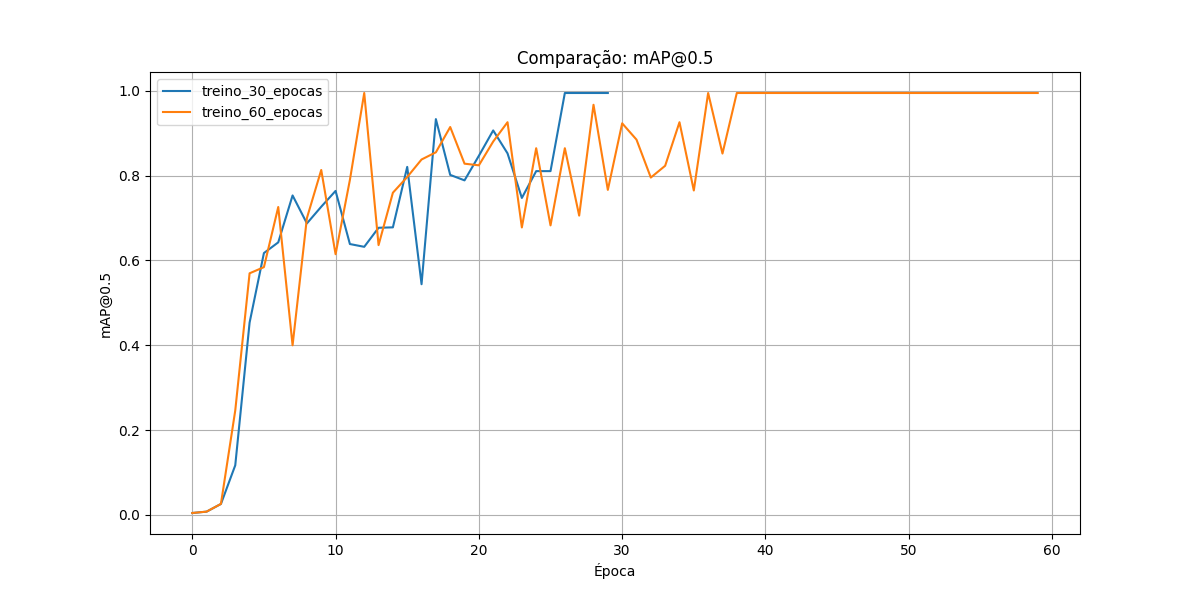

In [8]:
# 5. Comparação: mAP@0.5


import os
os.listdir('/content/yolov5/comparacoes')

from IPython.display import Image
Image(filename='/content/yolov5/comparacoes/map@0.5.png')

# 6. Gráficos Comparação: Box loss, Cls Loss, mAP@0.5, Obj Loss, Precisão, Revocação

📊 box_loss.png


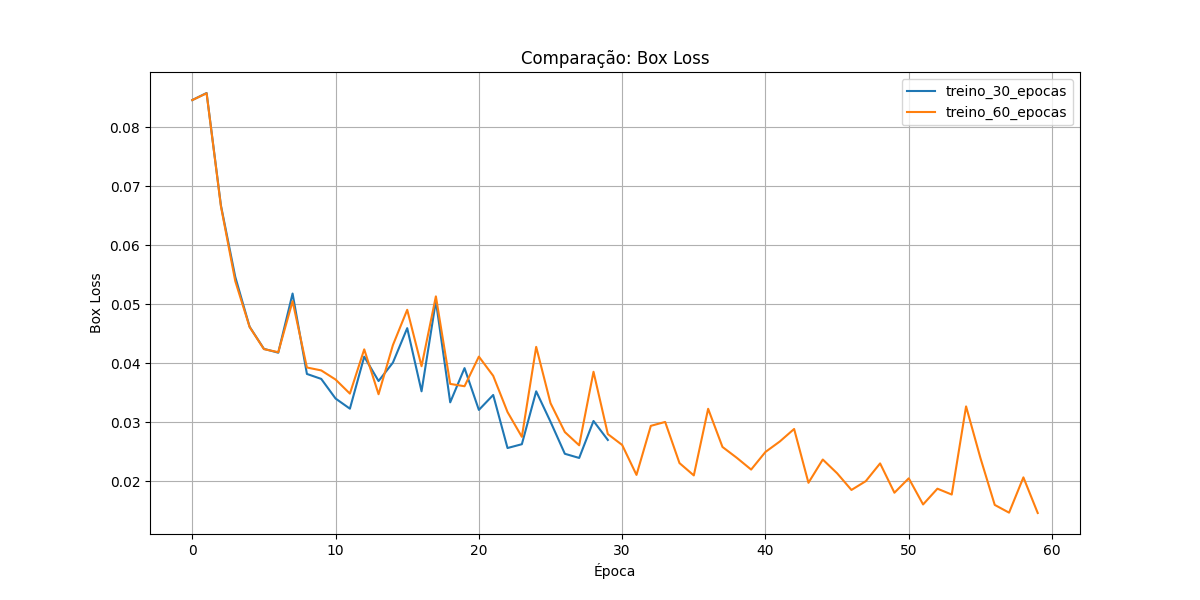

📊 cls_loss.png


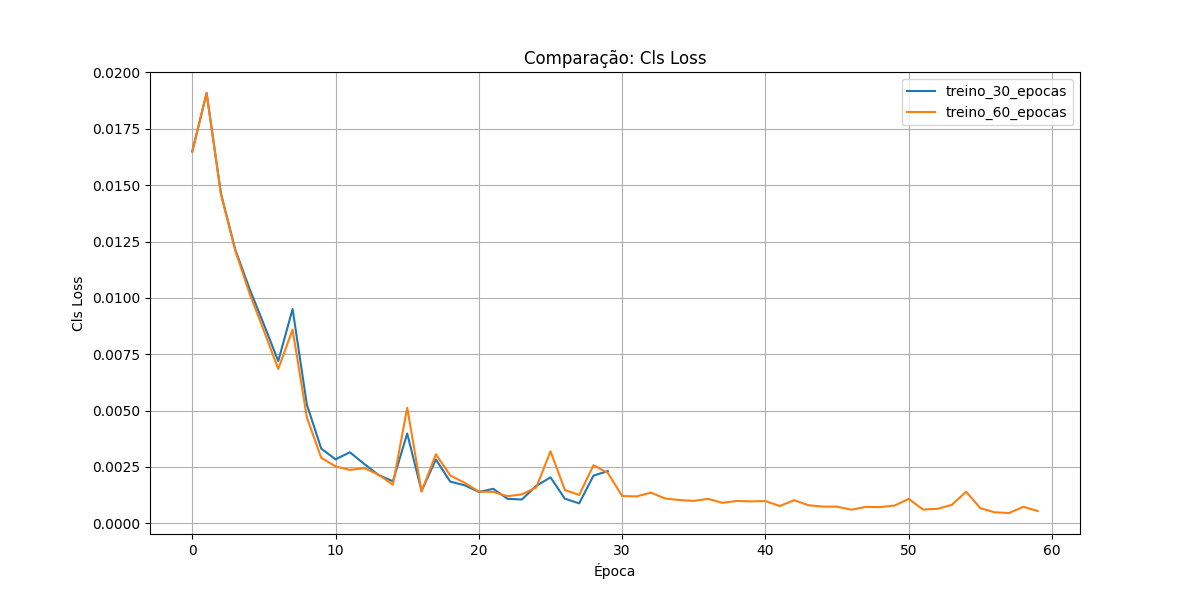

📊 map@0.5.png


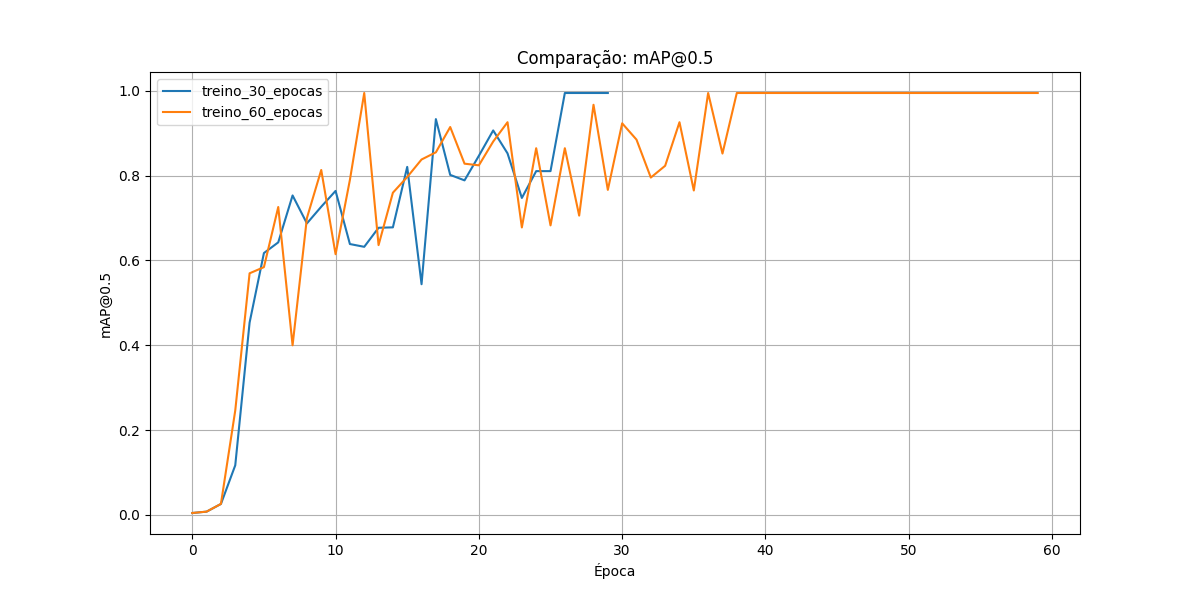

📊 obj_loss.png


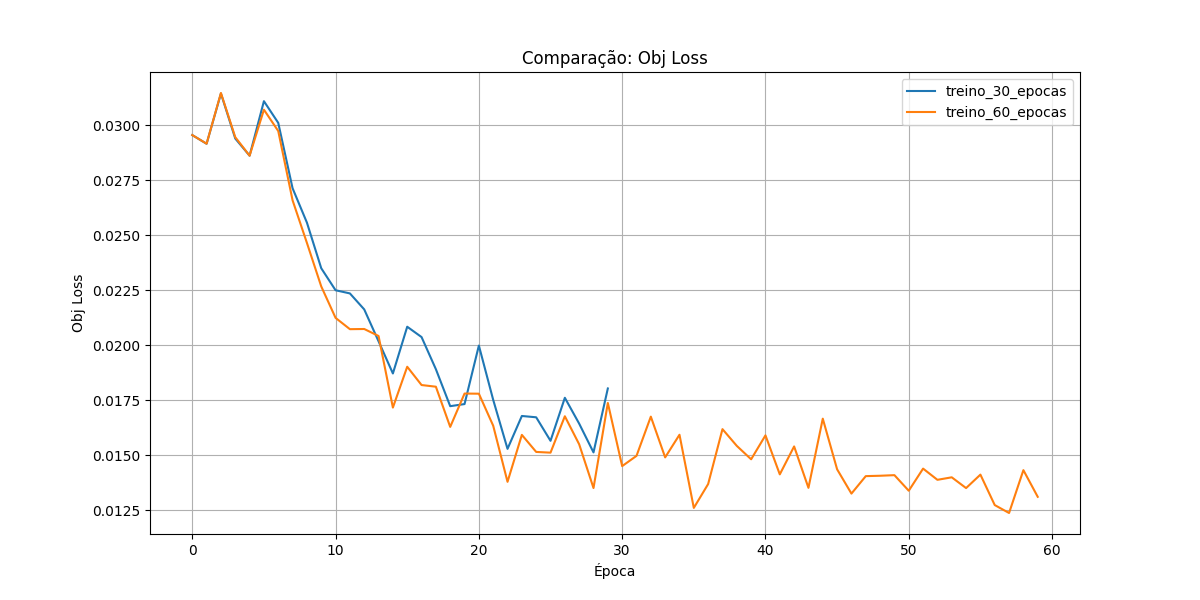

📊 precisão.png


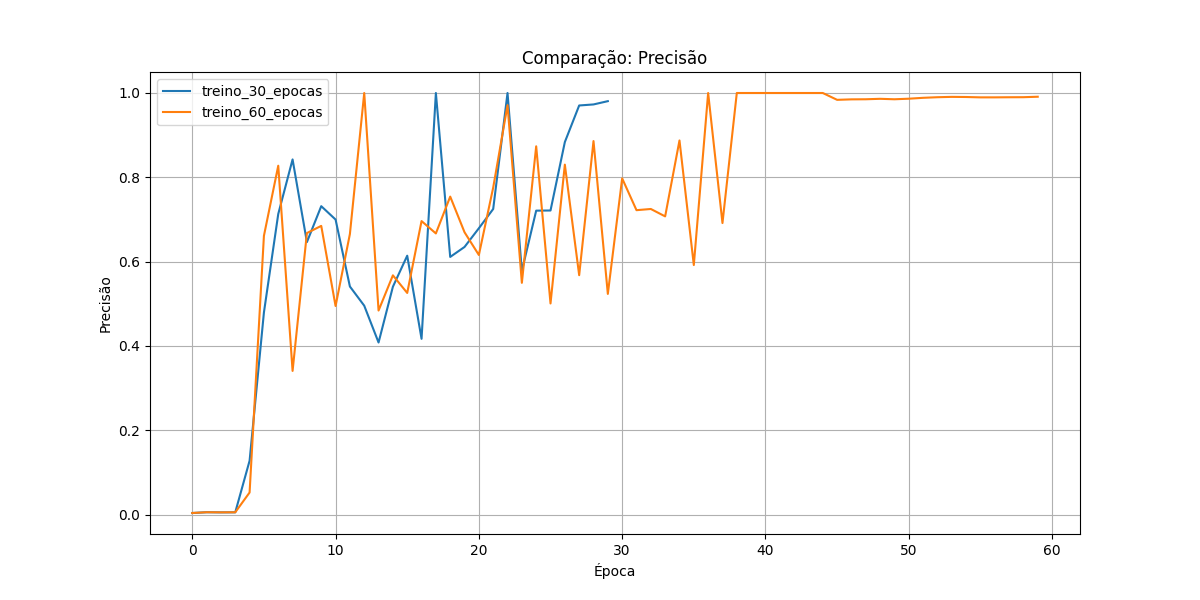

📊 revocação.png


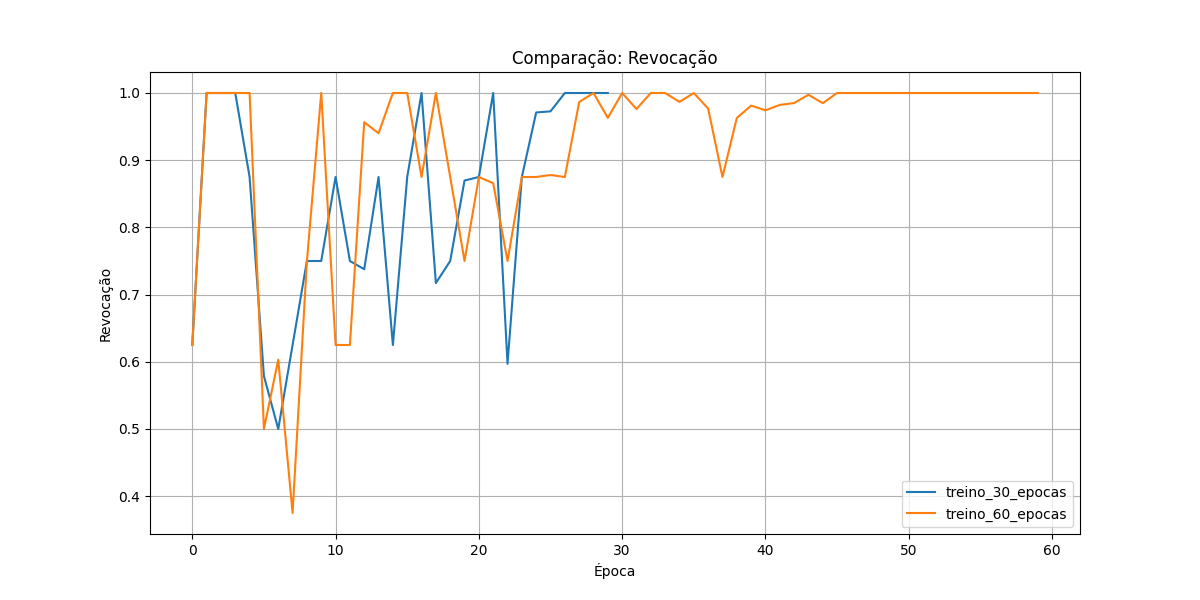

In [9]:
# 6. Gráficos Comparação: Box loss, Cls Loss, mAP@0.5, Obj Loss, Precisão, Revocação



from IPython.display import display, Image
import os

# Caminho onde os gráficos foram salvos
gallery_path = '/content/yolov5/comparacoes'

# Listar e exibir todos os gráficos
for file in sorted(os.listdir(gallery_path)):
    if file.endswith('.png'):
        print(f'📊 {file}')
        display(Image(filename=os.path.join(gallery_path, file)))

# 7. Gráficos exportados para:
https://drive.google.com/drive/folders/1ZxtzbTUtuOcnu7liDHek1MWhoi8lwZDb





In [10]:
# 7. Gráficos exportados para: /content/drive/MyDrive/FarmTechVision_Grupo7/YOLOv5_Graficos

from google.colab import drive
drive.mount('/content/drive')

import shutil

# Criar pasta no Drive
drive_folder = '/content/drive/MyDrive/FarmTechVision_Grupo7/YOLOv5_Graficos'
os.makedirs(drive_folder, exist_ok=True)

# Copiar os gráficos
for file in os.listdir(gallery_path):
    if file.endswith('.png'):
        shutil.copy(os.path.join(gallery_path, file), os.path.join(drive_folder, file))

print(f'✅ Gráficos exportados para: {drive_folder}')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Gráficos exportados para: /content/drive/MyDrive/FarmTechVision_Grupo7/YOLOv5_Graficos


# 8. Exportar imagens para o Google Drive
# Imagens de "runs/train/treino_30_epocas" exportado para "/content/drive/MyDrive/FarmTechVision_Grupo7/detect_30epocas"
# Imagens de "runs/train/treino_60_epocas" exportado para "/content/drive/MyDrive/FarmTechVision_Grupo7/detect_60epocas"

In [11]:
# Etapa 8: Exportar imagens para o Google Drive
# Imagens de "runs/train/treino_30_epocas" exportado para "/content/drive/MyDrive/FarmTechVision_Grupo7/detect_30epocas"
# Imagens de "runs/train/treino_60_epocas" exportado para "/content/drive/MyDrive/FarmTechVision_Grupo7/detect_60epocas"



from google.colab import drive
drive.mount('/content/drive')

import os
from IPython.display import Image, display
import shutil

# Caminho da pasta de detecção (assuming detect.py was run)
path_30 = 'runs/train/treino_30_epocas'
path_60 = 'runs/train/treino_60_epocas'


# Criar pastas no Drive
drive_path_30 = '/content/drive/MyDrive/FarmTechVision_Grupo7/detect_30epocas'
drive_path_60 = '/content/drive/MyDrive/FarmTechVision_Grupo7/detect_60epocas'
os.makedirs(drive_path_30, exist_ok=True)
os.makedirs(drive_path_60, exist_ok=True)

# Copiar imagens from detection folders
print(f"Attempting to copy images from: {path_30}")
if os.path.exists(path_30):
    for file in os.listdir(path_30):
        if file.endswith('.jpg') or file.endswith('.png'):
            shutil.copy(os.path.join(path_30, file), os.path.join(drive_path_30, file))
    print(f"✅ Images from {path_30} exported to {drive_path_30}")
else:
    print(f"⚠️ Source directory not found: {path_30}. Skipping export for 30 epochs.")


print(f"\nAttempting to copy images from: {path_60}")
if os.path.exists(path_60):
    for file in os.listdir(path_60):
        if file.endswith('.jpg') or file.endswith('.png'):
            shutil.copy(os.path.join(path_60, file), os.path.join(drive_path_60, file))
    print(f"✅ Images from {path_60} exported to {drive_path_60}")
else:
    print(f"⚠️ Source directory not found: {path_60}. Skipping export for 60 epochs.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Attempting to copy images from: runs/train/treino_30_epocas
✅ Images from runs/train/treino_30_epocas exported to /content/drive/MyDrive/FarmTechVision_Grupo7/detect_30epocas

Attempting to copy images from: runs/train/treino_60_epocas
✅ Images from runs/train/treino_60_epocas exported to /content/drive/MyDrive/FarmTechVision_Grupo7/detect_60epocas


# 9.  Resultados Visuais

# Abaixo estão os prints das imagens de teste processadas pelo modelo, com as detecções realizadas.

In [12]:
# 9. Resultados Visuais
# Abaixo estão os prints das imagens de teste processadas pelo modelo, com as detecções realizadas:

import os
from IPython.display import display, HTML
from PIL import Image
import base64
from io import BytesIO

# Caminhos das pastas de detecção
path_30 = 'runs/train/treino_30_epocas'
path_60 = 'runs/train/treino_60_epocas'

# Listar imagens comuns nas duas pastas
images_30 = set([f for f in os.listdir(path_30) if f.endswith('.jpg') or f.endswith('.png')])
images_60 = set([f for f in os.listdir(path_60) if f.endswith('.jpg') or f.endswith('.png')])
common_images = sorted(list(images_30.intersection(images_60)))

# Função para converter imagem em base64
def img_to_base64(path):
    with open(path, "rb") as f:
        data = f.read()
    return base64.b64encode(data).decode()

# Exibir imagens lado a lado
html = "<h3>🔍 Comparação visual entre 30 e 60 épocas</h3>"
for img_name in common_images:
    img_30 = img_to_base64(os.path.join(path_30, img_name))
    img_60 = img_to_base64(os.path.join(path_60, img_name))
    html += f"""
    <div style="display: flex; gap: 20px; margin-bottom: 20px;">
        <div>
            <p style="text-align: center;">30 épocas</p>
            <img src="data:image/jpeg;base64,{img_30}" width="300">
        </div>
        <div>
            <p style="text-align: center;">60 épocas</p>
            <img src="data:image/jpeg;base64,{img_60}" width="300">
        </div>
    </div>
    """

display(HTML(html))


Output hidden; open in https://colab.research.google.com to view.

# 10. Conclusões

## - O modelo com 60 épocas apresentou maior acurácia e menor erro de detecção.
## - O tempo de treinamento foi maior, mas compensado pela qualidade dos resultados.
## - O sistema demonstrou potencial para ser aplicado em cenários reais da FarmTech Solutions, como segurança patrimonial e controle de acessos.

# **Limitações**:
## - Dataset pequeno pode limitar a generalização.
## - Imagens com baixa qualidade ou iluminação prejudicam a detecção.